# Quantum Partition Function

The partition function is of particular interest for calculating probabilities from graphical models such Markov random fields [1]. It 
becomes intractable even for small networks [2]. In this example, the graphical model form known as the Potts model is considered. The
 efficient quantum algorithm is implemented for the partition function [3]. The full partition function algorithm consists of the 
 following four steps:
 
 * step 1: Classical Preprocessing
 * step 2: Irreducible Cyclic Cocycle Code Check
 * step 3: State Preparation and Quantum Fourier Transform
 * step 4: Classical Post-Processing

# References

[1] Koller, Daphne, and Nir Friedman. Probabilistic graphical models: principles and techniques. MIT press, 2009.

[2] Adedoyin, Adetokunbo, et al. "Quantum algorithm implementations for beginners." arXiv preprint arXiv:1804.03719 (2018).

[3] Geraci, Joseph, and Daniel A. Lidar. "On the exact evaluation of certain instances of the Potts partition function by quantum computers." Communications in mathematical physics 279.3 (2008): 735-768.

In [1]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker
t = Tracker().start()

## IMPORT STATEMENTS

First we import some modules we will need.

In [5]:
# general imports
import asyncio
import numpy as np
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline
import string
from datetime import datetime
import logging

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.aws import AwsDevice, AwsQuantumTask
from braket.devices import LocalSimulator

1. graph - irreducible cyclic cocycle code (ICCC) check
2. identify the linear code C() for which we shall determine the weight spectrum
3. gauss sum estimation
4. weight spectrum 
5. weight spectrum of a code and Z

## Classical Preprocessing

## Irreducible Cyclic Code Via Shor's

## State Preparation and Quantum Fourier Transform

In [38]:
pi/4 *4

3.14

In [42]:
pi = 3.14
q0 = 0
q1 = 1
my_circuit = Circuit().h(range(2)).rz(q0,-pi).rz(q1,pi).h(q0).rz(q1,pi/4).cnot(q1,q0).rz(q0,-pi/4).cnot(q1,q0).rz(q0,pi/4).h(q1).cnot(q1,q0).h(range(2)).cnot(q1,q0).h(range(2)).cnot(q1,q0)

print(my_circuit)

T  : |0|    1    |   2    |3|    4    |5|   6    |7|8|9|10|11|
                                                              
q0 : -H-Rz(-3.14)-H--------X-Rz(-0.79)-X-Rz(0.79)-X-H-X-H--X--
                           |           |          |   |    |  
q1 : -H-Rz(3.14)--Rz(0.79)-C-----------C-H--------C-H-C-H--C--

T  : |0|    1    |   2    |3|    4    |5|   6    |7|8|9|10|11|


In [43]:
# set up the device to be the on-demand simulator
# device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")
device = LocalSimulator()

Status of task: COMPLETED
Counter({'01': 507, '11': 493})


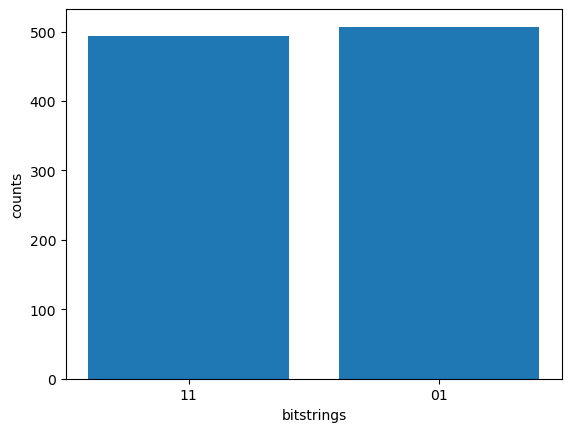

In [64]:
# define task (asynchronous)
task = device.run(my_circuit, 
                  shots=1000)

# get id and status of submitted task
task_id = task.id
status = task.state()
# print('ID of task:', task_id)
print('Status of task:', status)

# wait for job to complete
while status != 'COMPLETED':
    status = task.state()
    print('Status:', status)

# get results of task
result = task.result()

# get measurement shots
counts = result.measurement_counts

# reverse_counts = {}

# for k in counts.keys():
#     r_k = k[::-1]
#     reverse_counts[r_k] = counts[k]

# print counts
print(counts)
# print(reverse_counts)

# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

## Classical Post-Processing

In [2]:
partition_func_qasm = """

qreg q[5];
creg c[5];

h q[0];
h q[1];
u1(-pi) q[0];
u1(pi) q[1];
barrier q[0],q[1],q[2],q[3],q[4];
h q[0];
u1(pi/4) q[1];
cx q[1],q[0];
u1(-pi/4) q[0];
cx q[1],q[0];
u1(pi/4) q[0];
h q[1];
cx q[1],q[0];
h q[0];
h q[1];
cx q[1],q[0];
h q[0];
h q[1];
cx q[1],q[0];
measure q[0] -> c[0];
measure q[1] -> c[1];

"""

In [ ]:
partition_func_qasm = """
OPENQASM 3;

qubit[5] q;
bit[5] c;

h q[0];
h q[1];
u1(-pi) q[0];
u1(pi) q[1];
barrier q[0],q[1],q[2],q[3],q[4];
h q[0];
u1(pi/4) q[1];
cx q[1],q[0];
u1(-pi/4) q[0];
cx q[1],q[0];
u1(pi/4) q[0];
h q[1];
cx q[1],q[0];
h q[0];
h q[1];
cx q[1],q[0];
h q[0];
h q[1];
cx q[1],q[0];
measure q[0] -> c[0];
measure q[1] -> c[1];

"""

In [3]:
import boto3
import json
from braket.aws import AwsDevice

In [4]:
from braket.ir.openqasm import Program as OpenQASMProgram

sv1 = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

bell_program = OpenQASMProgram(source=partition_func_qasm)

bell_task = sv1.run(
    bell_program, 
    shots=100, 
)

ValidationException: An error occurred (ValidationException) when calling the CreateQuantumTask operation: [line 8] uses a gate: u1 which is not supported by the device or defined via a defcal